# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier



In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data load + prepare

In [3]:
url = "https://archive.ics.uci.edu/static/public/45/data.csv"
df = pd.read_csv(url)

print(f'Dataframe shape : {df.shape}\n')

df.head()

Dataframe shape : (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [5]:
df_clean = df.dropna()
print(f'Dataframe shape : {df_clean.shape}\n')

print(df_clean.isnull().sum())

Dataframe shape : (297, 14)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## Compute new features

In [6]:
df_clean['age_chol'] = df_clean['age'] * df_clean['chol']
df_clean['bp_chol_ratio'] = df_clean['trestbps'] / (df_clean['chol'] + 1e-5)
df_clean['chol_ratio'] = df_clean['chol'] / 50

In [7]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_chol,bp_chol_ratio,chol_ratio
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,14679,0.622318,4.66
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,19162,0.559441,5.72
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,15343,0.524017,4.58
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,9250,0.520000,5.00
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,8364,0.637255,4.08


# Data split

In [8]:
# convert to binary target
# 0 = no disease
# 1 = disease

X = df_clean.drop(columns=['num'])
y = (df_clean['num'] > 0).astype(int)  

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [9]:
print("Train set:", X_train.shape, y_train.value_counts().to_dict())
print("Validation set:", X_val.shape, y_val.value_counts().to_dict())
print("Test set:", X_test.shape, y_test.value_counts().to_dict())

Train set: (207, 16) {0: 112, 1: 95}
Validation set: (45, 16) {0: 24, 1: 21}
Test set: (45, 16) {0: 24, 1: 21}


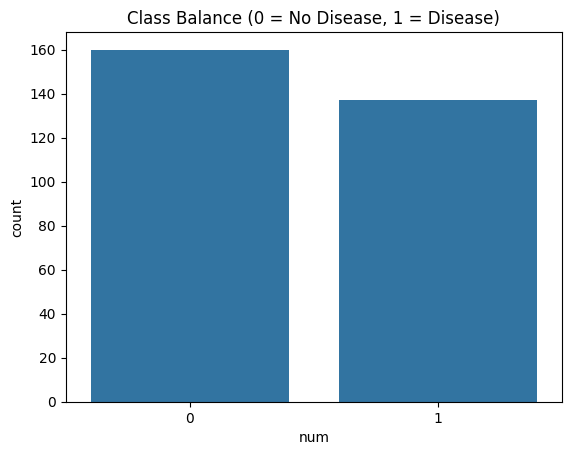

In [10]:
sns.countplot(x=y)
plt.title("Class Balance (0 = No Disease, 1 = Disease)")
plt.show()

# Models

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel='rbf', probability=True))
    ]),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


## Cross validation + evaluation


MODEL Logistic Regression
Val accuracy: 0.7556
Val f1 score: 0.7533
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.78      0.67      0.72        21

    accuracy                           0.76        45
   macro avg       0.76      0.75      0.75        45
weighted avg       0.76      0.76      0.75        45



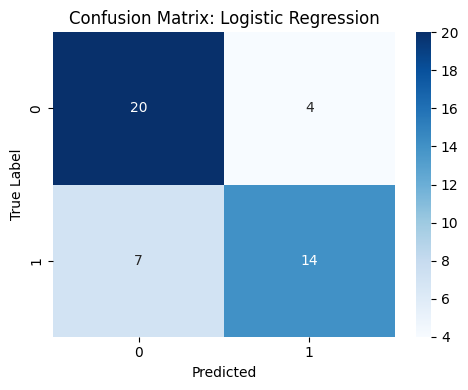


MODEL SVM
Val accuracy: 0.7111
Val f1 score: 0.6945
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.92      0.77        24
           1       0.83      0.48      0.61        21

    accuracy                           0.71        45
   macro avg       0.75      0.70      0.69        45
weighted avg       0.74      0.71      0.69        45



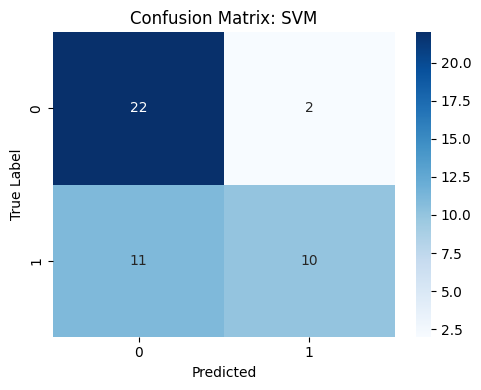


MODEL Random Forest
Val accuracy: 0.7333
Val f1 score: 0.7259
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.80      0.57      0.67        21

    accuracy                           0.73        45
   macro avg       0.75      0.72      0.72        45
weighted avg       0.75      0.73      0.73        45



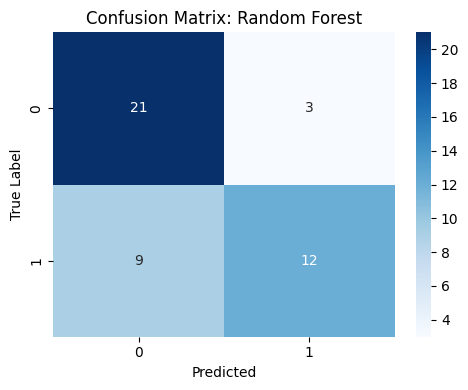


MODEL XGBoost
Val accuracy: 0.7778
Val f1 score: 0.7716
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        24
           1       0.87      0.62      0.72        21

    accuracy                           0.78        45
   macro avg       0.80      0.77      0.77        45
weighted avg       0.80      0.78      0.77        45



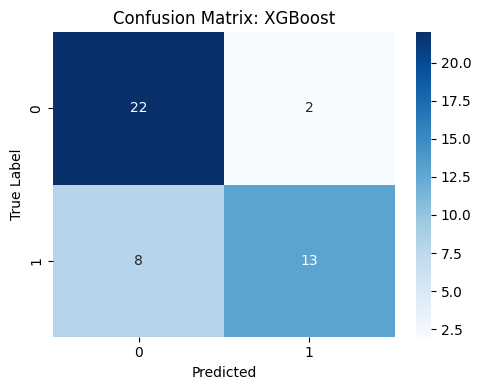

In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    print(f"\n================================================")
    print(f"MODEL {name}")

    acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc_val = accuracy_score(y_val, y_pred)
    f1_val = f1_score(y_val, y_pred, average='weighted')

    print(f"Val accuracy: {acc_val:.4f}")
    print(f"Val f1 score: {f1_val:.4f}")
    print("Classification report:")
    print(classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    results[name] = {
        "CV accuracy": np.mean(acc_scores),
        "CV f1 score": np.mean(f1_scores)
    }

In [13]:
results_df = pd.DataFrame(results).T.sort_values(by="CV f1 score", ascending=False)
print("CV evaluation")
display(results_df)

CV evaluation


,CV accuracy,CV f1 score
Logistic Regression,0.820906,0.820137
Random Forest,0.806620,0.805778
XGBoost,0.801974,0.801212
SVM,0.801742,0.799974


## Tuning SVM/XGBoost (Grid Search)

In [14]:
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(probability=True))
])

svm_params = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": [0.01, 0.1, 1],
    "clf__kernel": ['rbf']
}

svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='f1_weighted')
svm_grid.fit(X_train, y_train)
print("best SVM:", svm_grid.best_params_)


best SVM: {'clf__C': 1, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


In [15]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_params = {
    "max_depth": [3, 4, 5],
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.3]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='f1_weighted')
xgb_grid.fit(X_train, y_train)
print("best XGBoost:", xgb_grid.best_params_)

best XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


## Evaluation best models


MODEL Logistic Regression
Test accuracy: 0.9556
Test f1 score: 0.9556
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.95      0.95      0.95        21

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



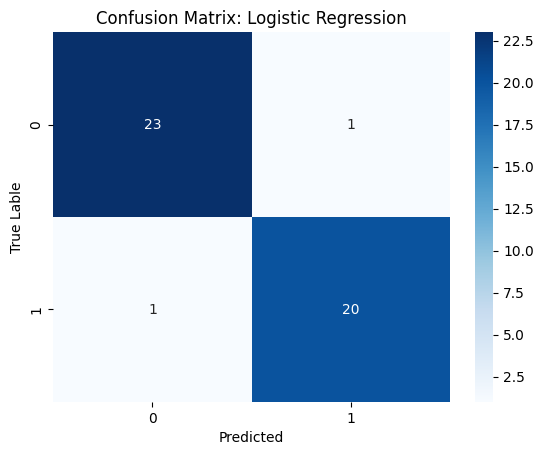


MODEL SVM
Test accuracy: 0.9333
Test f1 score: 0.9332
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.95      0.90      0.93        21

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



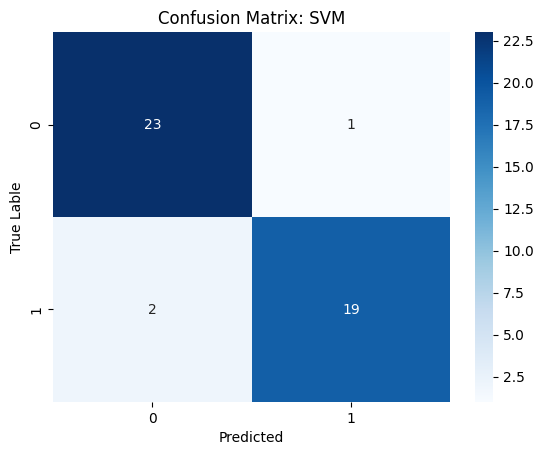


MODEL Random Forest
Test accuracy: 0.8889
Test f1 score: 0.8887
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.90      0.86      0.88        21

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



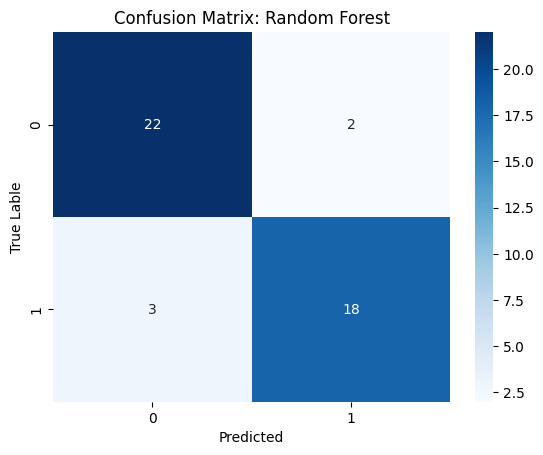


MODEL XGBoost
Test accuracy: 0.8667
Test f1 score: 0.8660
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.89      0.81      0.85        21

    accuracy                           0.87        45
   macro avg       0.87      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45



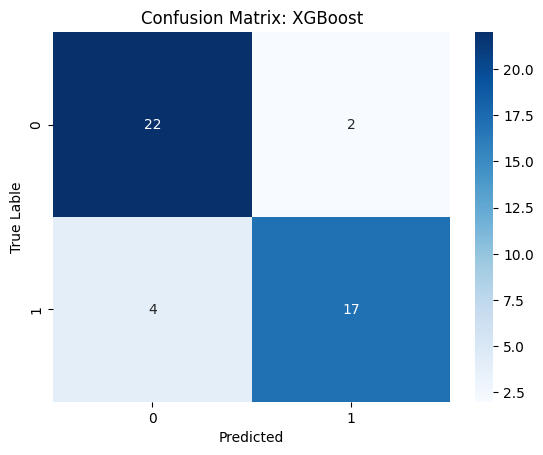

In [16]:
final_results = {}

best_models = {
    "Logistic Regression": models["Logistic Regression"].fit(X_train, y_train),
    "SVM": svm_grid.best_estimator_,
    "Random Forest": models["Random Forest"].fit(X_train, y_train),
    "XGBoost": xgb_grid.best_estimator_
}

for name, model in best_models.items():
    print(f"\n================================================")
    print(f"MODEL {name}")

    y_pred = model.predict(X_test)

    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred, average='weighted')

    print(f"Test accuracy: {acc_test:.4f}")
    print(f"Test f1 score: {f1_test:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True Lable")
    plt.show()

    final_results[name] = {
        "Test accuracy": acc_test,
        "Test f1 score": f1_test
    }


In [17]:
test_results_df = pd.DataFrame(final_results).T.sort_values(by="Test f1 score", ascending=False)
print("Test evaluation")
display(test_results_df)

Test evaluation


,Test accuracy,Test f1 score
Logistic Regression,0.955556,0.955556
SVM,0.933333,0.933201
Random Forest,0.888889,0.888668
XGBoost,0.866667,0.866000


In [18]:
# pd.DataFrame(final_scores).T.plot(kind='bar', figsize=(8, 5), title="Final Model Comparison")
# plt.xticks(rotation=45)
# plt.ylabel("Score")
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()


# Save BEST MODEL

In [19]:
from joblib import dump

best_model_name = max(final_results, key=lambda k: final_results[k]['Test f1 score'])
best_model = best_models[best_model_name]

dump(best_model, "best_model.pkl")
print(f"Best model: {best_model_name}")


Best model: Logistic Regression


In [20]:
import joblib
model = joblib.load("best_model.pkl")


## ROC Curves

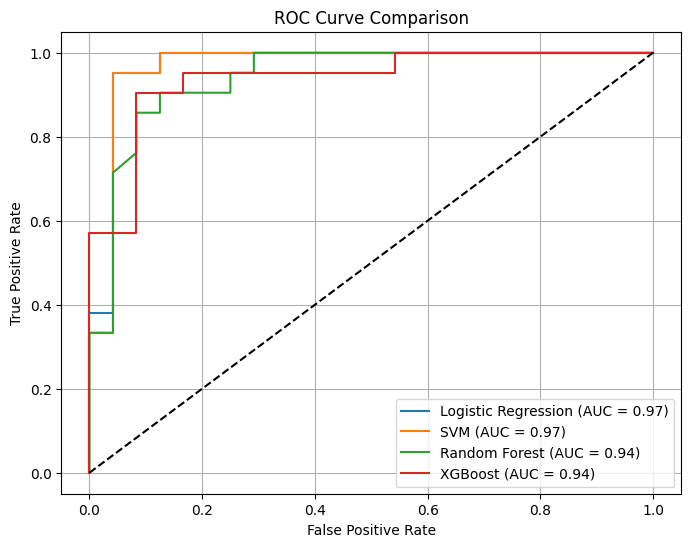

In [21]:
plt.figure(figsize=(8, 6))
for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

